# Dictionaries

In Python there is another important built-in type, called **dictionary**. 

We can think of a dictionary as a more general list, where the indices can be (almost) any type, not only ```int``` types.

A dictionary contains a collection of (**key-value pair**). More specifically:

1. a collection of *distinct* indices, which are called **keys**;
2. a collection of **values**, where each key is associated with a single value .

In mathematical language, a dictionary represents a mapping  $keys \rightarrow values$, so you
can also say that “each key maps to a value”. 

As an example, we can build a dictionary that
maps from English to Italian words, so the keys and the values are all strings.



In [7]:
eng2ita = {}              # empty dictionary   

eng2ita['one'] = 'uno'    # this statement add a pair
eng2ita['two'] = 'due'    # this statement add a pair

print(eng2ita)


l = ['uno', 'due', 'tre'] 
for el in l:
    print(el)

for i in range(len(l)):
    print(l[i])


print('******************')
eng2ita = {'one' : 'uno',  'two' : 'due', 'three' : 'tre'} # initialize with 3 key-value pairs
for k in eng2ita:  # scan a dictionary for keys
    print(k, "-->", eng2ita[k])
print('******************')
print(eng2ita)



{'two': 'due', 'one': 'uno'}
uno
due
tre
uno
due
tre
******************
two --> due
one --> uno
three --> tre
******************
{'two': 'due', 'one': 'uno', 'three': 'tre'}


The ```len()``` function works on dictionaries too, and returns the number of key-value pairs.

Also the operator ```del```  works on dictionaries.

The ```in``` operator works on dictionaries too, and tells us whether something appears as a *key*
in the dictionary.

To see whether something appears as a *value* in a dictionary, you can use the method ```.values()```  which returns a collection of values, and then use the ```in``` operator.

For dictionaries, Python uses a technique called **hashtable** that has a remarkable property:
the ```in``` operator takes about the **same amount of time** no matter how many items are
in the dictionary. The same doesn't hold for lists, where the search is linear (as in principle a list is not sorted), and thus becomes very expensive on long lists.

In [8]:
print(len(eng2ita))
print('one' in eng2ita)
print('uno' in eng2ita)  # 'uno is not found among the keys

vals = eng2ita.values()  # return a collection of values, on which you can apply operator in
print(vals)
print('uno' in vals)     # 'uno' is found among the values 

if 'one' in eng2ita:
    del eng2ita['one']       # remove the element with key 'uno'
print(eng2ita)

3
True
False
dict_values(['due', 'uno', 'tre'])
True
{'two': 'due', 'three': 'tre'}


### A dictionary to build a histogram

Suppose you are given a string and you want to count how many times each letter appears.
Or you have a collection of words, and you want to count how many times each word appears in the collection.

You could create a **dictionary** with the *elements to count* as **keys** and *counters* as the corresponding
**values**. The first time you see a give elements, add the element to the dictionary, with value equal to 1. After that, you would increment the value of the existing element.

An advantage of the **dictionary implementation** is that we
don’t have to know ahead of time which element appear in the collection, and we only have to
make room for elements that do appear.

In the following we thus define a function ```histogram(elems)```, which is a *statistical term* for a collection of counters (or *frequencies*). We then apply the function to the collection of words of the book: *Alice in Wonderland*.

In [11]:
f = open("Alice_in_Wonderland_ok.txt")  # "r" is the default mode
book_content = f.read()                # single string
f.close()

book_words = book_content.split()  # list of all words with repetitions 

def histogram(elems):
    """ 
        Algorithm to create and return a dictionary <key, value>, where 'key' belong
        to the input collection 'elems', and 'value' if the count of how many time 
        'key' appear in 'elems' (frequency)
        
        Args:
                 elems: a list of elements with replications
        Returns:
                 the created dictionary
    """

    histo = dict()   # is the same as histo = {}
    
    # for each e in the list elems
    for e in elems:
        e = e.lower()
        if e in histo:  # check if e was already found and previously inserted
            histo[e] = histo[e] + 1 # if YES then update the associated value (+1)
        else:
            histo[e] = 1   # otherwise introduce a new pair (e:1)
    return histo
        
hist_dict = histogram(book_words[:2000])  # create the histogram
print(hist_dict)

{'dreamy': 1, 'fear': 1, 'hurrying': 1, 'my': 5, 'feel': 1, 'showing': 1, 'possibly': 1, 'close': 2, 'couldnt': 1, 'aloud': 1, 'please': 1, 'leaves': 1, 'truth': 1, 'cake': 1, 'histories': 1, 'back': 2, 'must': 2, 'milk': 1, 'tea-time': 1, 'long': 3, 'do': 9, 'feet': 2, 'burnt': 1, 'sometimes': 2, 'marked': 3, 'waistcoat-pocket': 2, 'label': 1, 'chapter': 1, 'miles': 2, 'to-night': 1, 'while': 1, 'bottle': 4, 'your': 1, 'advice': 1, 'curtseying': 1, 'nervous': 1, 'on': 13, 'catch': 1, 'sitting': 1, 'first': 4, 'considering': 2, 'another': 3, 'box': 2, 'opened': 2, 'buttered': 1, 'beds': 1, 'large': 3, 'hear': 2, 'question': 1, 'wonder': 6, 'end': 2, 'bleeds': 1, 'ears': 2, 'listen': 1, 'person': 1, 'burning': 1, 'thought': 8, 'are': 1, 'worth': 1, 'go': 1, 'well': 6, 'hope': 1, 'longer': 1, 'over': 3, 'happened': 2, 'alice': 25, 'croquet': 1, 'larger': 1, 'up': 12, 'later': 1, 'fell': 4, 'and': 58, 'pretend': 1, 'so': 11, 'let': 1, 'beginning': 1, 'knowledge': 1, 'without': 2, 'falling

### Invert the histogram

An interesting exercise is to invert the dictionary: for each value identify the list of keys that map to the same value. 

The following figure illustrates a dictionary along with the inverted dictionary, where the original dictionary maps single characters to integer counts.

![Inverted Dictionary](./images/inverted_dict.png)

We apply the new function ```def invert_dict(d)``` to the histogram dictionary of all the words of the book: *Alice in Wonderland*. 
Hence, for each count the interted dictionary identifies a list of words that occur the same number of times.

Then we print the most frequent words, with the corresponding counts.

Note that in the following we use an alternative method to sort lists. Besides the built-in ```sort()``` method that modifies the list in-place, python also provides the ```sorted()``` built-in function that builds a new sorted list from an iterable, e.g., from a list or a dictionary.



In [5]:
def invert_dict(d):
    """ 
        Algorithm to invert the input dictionary 'd', returning a new dictionary.
        Each 'key' of the new dictionary is a 'value' of the old one.
        Each 'value' of the new dictionary is a list of keys of the old dictionary, each mapping 
        to the same value (the new key)
                
        Args:
                 d: the old dictionary
        Returns:
                 the created new inverted dictionary
    """
    inverse = dict() # the new dictionary
    for key in d:
        val = d[key]
        if val not in inverse:
            inverse[val] = [key]
        else:
            inverse[val].append(key)
    return inverse


inverted = invert_dict(hist_dict)

list_vals = []
for v in inverted:
    list_vals.append(v)
list_vals.sort(reverse = True)  # sort in reverse order


#list_vals = [v for v in inverted] # alternative 1 to produce the sorted list of keys
#list_vals.sort(Reverse = True)


#list_vals = sorted(inverted)  # alternative 2 to produce the sorted list of keys

for i in list_vals[:40]:  # scan the first 40 most frequent elements
        print(i,':',inverted[i])

1514 : ['the']
772 : ['and']
716 : ['to']
609 : ['a']
498 : ['she']
494 : ['of']
480 : ['it']
453 : ['said']
396 : ['I']
385 : ['Alice']
353 : ['in']
352 : ['was']
307 : ['you']
256 : ['that']
245 : ['as']
243 : ['her']
199 : ['at']
189 : ['on']
177 : ['had']
175 : ['with']
171 : ['all']
144 : ['be']
139 : ['for']
128 : ['not']
126 : ['very', 'but']
124 : ['little']
121 : ['so']
112 : ['out']
111 : ['this']
107 : ['The', 'they']
98 : ['down']
97 : ['he']
96 : ['up']
94 : ['his', 'about']
91 : ['one']
90 : ['is', 'what']
89 : ['its']
87 : ['were']
84 : ['like']
83 : ['them', 'herself', 'went']


## MATPLOTLIB

By using ```matplotlib```, we can plot for each frequency *f* the number of words occurring in the text  *f* times. 

See many possible examples here [matplotlib](https://matplotlib.org/gallery/index.html).


Len of the list of frequencies:  110


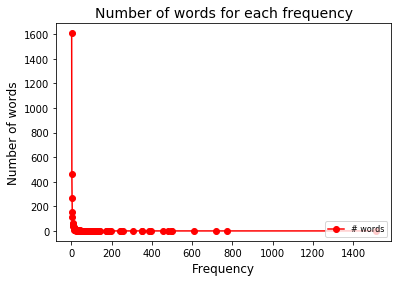

In [6]:
#### This is a special command for the jupyter notebook
# asking to render plots within the notebook itself
# It should be used just one at the beginning of the notebbok
%matplotlib inline


# This is the way we access to the matplotlib library
# The main library name is matplotlib
# We need the sub-package pyplot
# and we want to refer to it with a friendly alias plt
import matplotlib.pyplot as plt

list_freq = sorted(inverted)
print("Len of the list of frequencies: ", len(list_vals))
list_num_words = []
for  k in list_freq: 
    list_num_words.append(len(inverted[k]))
                   
# The simplest plot!
# The 1st param is a list with the values for the X axis
# The 2nd param is alist with the values for the Y axis
# The 3rd param is the type of plot r=red  o=circles -=dash
# The 4th param is the label of each (x,y) point
plt.plot(list_freq, list_num_words, 'ro-', label = '# words')

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Number of words", fontsize=12)
plt.title("Number of words for each frequency", fontsize=14)
plt.legend( loc='lower right', fontsize=8)

plt.show()


The methods ```.items()```, ```.keys()```, and ```.values()``` returns the list of pairs, keys, and values of a dictionary: 

In [7]:
student_data = {
 'id1': 'Andrea', 
 'id2': 'Marco',
 'id3': 'Luca',
 'id4': 'Giovanni'
}

print(student_data.items())
print(type(student_data.items()))

print(student_data.keys())
print(type(student_data.keys()))

print(student_data.values())
print(type(student_data.values()))


dict_items([('id2', 'Marco'), ('id1', 'Andrea'), ('id3', 'Luca'), ('id4', 'Giovanni')])
<class 'dict_items'>
dict_keys(['id2', 'id1', 'id3', 'id4'])
<class 'dict_keys'>
dict_values(['Marco', 'Andrea', 'Luca', 'Giovanni'])
<class 'dict_values'>


## Exercises

1. Write a Python function to combine two dictionaries, by adding values for common keys. 
2. Write a Python program to create a dictionary from a string, where each pair is ```(c, count)``` where ```c``` is a char of the string, and ```count``` registers the number of occurrences of the char in the string.
3. Write a function that takes a date in the “dd-MMM-yy” format (a string) and responds with a tuple of integers ```(y, m, d)``` (a tuple in an immutable list). 
<br/>
Create a *dictionary* suitable for decoding month names to numbers. Use the string operations to split the date into 3 items using the “-” character as a separator.
Correct the year to include all of the digits (the years goes from 1950 till 2010).




In [18]:
# Write a function that takes a string, and returns the number of 
# occurrences of each character within a given SET 



def count_char(s):
    printable = "abcABC12345678910"
    # return a dictionary 
    # {'A':2, 'a':3, '1':6}   <=====  "11AaaaA1111"
    count = {}  
    for c in s:
        if c in printable:
            # check if c is already in the count dictionary
            if c in count:
                count[c] =  count[c] + 1   # TRUE: +1
            else:
                count[c] = 1               # FALSE: create pair (c:1)
    return count


def count_char1(s):
    printable = "abcABC12345678910"
    # return a dictionary 
    # {'A':2, 'a':3, '1':6}   <=====  "11AaaaA1111"

    count = {} 
    for c in printable:
        count[c] = 0     # {'a':0, 'b':0, 'c':0, 'A':0, ....}
        
    for c in s:
        if c in count:
            count[c] =  count[c] + 1 
    return count




example = "11AaaaA1111"
print(count_char(example))
print(count_char1(example))

my_dict = {1:'aaa', 1.2:34, "hhh":"cscs", "eee":[1,2,3]}
print(my_dict)

    

{'1': 6, 'A': 2, 'a': 3}
{'C': 0, '6': 0, 'c': 0, '1': 6, '0': 0, '2': 0, '8': 0, '5': 0, '9': 0, 'A': 2, 'b': 0, 'a': 3, 'B': 0, '3': 0, '4': 0, '7': 0}
{'eee': [1, 2, 3], 1: 'aaa', 'hhh': 'cscs', 1.2: 34}


In [20]:
# Write a Python function to combine two dictionaries, by adding values for common keys

first = {'beer':10, 'wine':100, 'diaper':12}
second = {'beer':1000, 'bread':100, 'wine':10}
total = {'beer':1010, 'wine':110, 'diaper':12, 'bread':100}

def union_multiset(set1, set2):
    union = set1
    
#    for k in set1:
#        if k in union:  # if the key k is already present, then increment, otherwise create a new entry in union
#            union[k] = union[k] + set1[k]
#       else:
#            union[k] = set1[k]
    for k in set2:
        if k in union:  # if the key k is already present, then increment, otherwise create a new entry in union
            union[k] = union[k] + set2[k]
        else:
            union[k] = set2[k]

    return union

print(union_multiset(first, second))



{'beer': 1010, 'diaper': 12, 'wine': 110, 'bread': 100}
